In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
#!pip install --upgrade spacy
#!pip install wordcloud

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import spacy
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#print(train)
train=train.drop('id', axis=1)
print(train)
test=test.drop('id', axis=1)




                                             comment_text  toxic  \
0       Explanation\nWhy the edits made under my usern...      0   
1       D'aww! He matches this background colour I'm s...      0   
2       Hey man, I'm really not trying to edit war. It...      0   
3       "\nMore\nI can't make any real suggestions on ...      0   
4       You, sir, are my hero. Any chance you remember...      0   
...                                                   ...    ...   
159566  ":::::And for the second time of asking, when ...      0   
159567  You should be ashamed of yourself \n\nThat is ...      0   
159568  Spitzer \n\nUmm, theres no actual article for ...      0   
159569  And it looks like it was actually you who put ...      0   
159570  "\nAnd ... I really don't think you understand...      0   

        severe_toxic  obscene  threat  insult  identity_hate  
0                  0        0       0       0              0  
1                  0        0       0       0            

In [5]:
total_null = train.isnull().sum()
print(total_null)

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [6]:
total_null = test.isnull().sum().sort_values(ascending = False)
print(total_null)

comment_text    0
dtype: int64


In [7]:
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']
print(train[cols_target].sum())

obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


In [8]:
x=train.iloc[:,1:]
#print(x)
y=train.iloc[:,1:].sum()
#print(y)
rowsums=train.iloc[:,2:].sum(axis=1)
#print(rowsums)
train['clean']=(rowsums==0)
train['clean'].sum()
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total clean comments =  149012
Total tags = toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


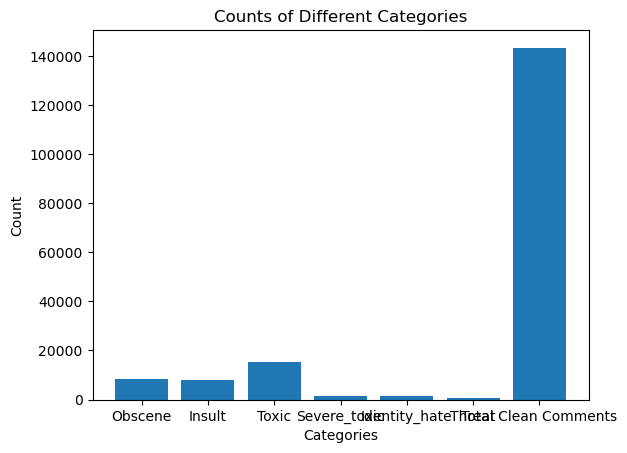

In [9]:

categories = ['Obscene', 'Insult', 'Toxic', 'Severe_toxic', 'Identity_hate', 'Threat', 'Total Clean Comments']
counts = [8449, 7877, 15294, 1595, 1405, 478, 143346]

# Create the bar plot

#xvals=range(len(counts))
#plt.bar(xvals, counts)
#plt.tick_params(bottom=False)
#plt.xticks(xvals,['Obscene', 'Insult', 'Toxic', 'Severe_toxic', 'Identity_hate', 'Threat', 'Total Clean Comments'], rotation=30
  #,horizontalalignment='right')

#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
# Create the bar plot
plt.bar(categories, counts)

# Labeling the axes and giving a title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Counts of Different Categories')

# Show the plot
plt.show()


#plt.bar(categories, counts)



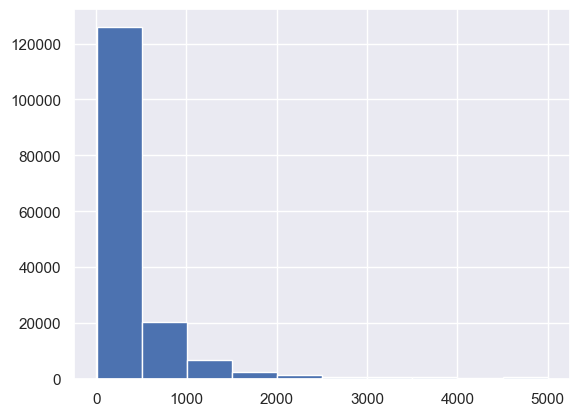

In [10]:
# Let's look at the character length for the rows in the training data and record these
train['char_length'] = train['comment_text'].apply(lambda x: len(str(x)))
# look at the histogram plot for text length
sns.set()
train['char_length'].hist()
plt.show()

<Axes: title={'center': 'Correlation of features & targets'}>

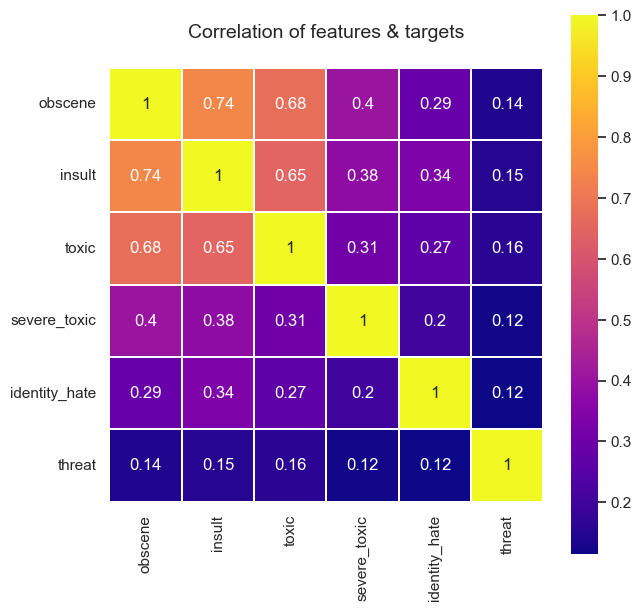

In [11]:
data = train[cols_target]
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [13]:
train['comment_text'] = train['comment_text'].map(lambda com : clean_text(com))
test['comment_text'] = test['comment_text'].map(lambda com : clean_text(com))


In [14]:
train

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,char_length
0,explanation why the edits made under my userna...,0,0,0,0,0,0,True,264
1,d aww he matches this background colour i am s...,0,0,0,0,0,0,True,112
2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,True,233
3,more i cannot make any real suggestions on imp...,0,0,0,0,0,0,True,622
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,True,67
...,...,...,...,...,...,...,...,...,...
159566,and for the second time of asking when your vi...,0,0,0,0,0,0,True,295
159567,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0,True,99
159568,spitzer umm theres no actual article for prost...,0,0,0,0,0,0,True,81
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,True,116


In [15]:
train = train.drop('clean',axis=1) #we used char_length for plotting distribution now lets remove it


In [16]:
#X = train.comment_text
#test_X = test.comment_text
x = train.iloc[:, :1].values
y = train.iloc[:, 1:].values




In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [18]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y_train, y_test = train_test_split(train, random_state=42, test_size=0.2, shuffle=True)
x_train = y_train.comment_text
x_test = y_test.comment_text

In [19]:
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,char_length
0,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,d aww he matches this background colour i am s...,0,0,0,0,0,0,112
2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,233
3,more i cannot make any real suggestions on imp...,0,0,0,0,0,0,622
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67


In [20]:
y_train

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,char_length
140030,grandma terri should burn in trash grandma ter...,1,0,0,0,0,0,111
159124,9 may 2009 utc it would be easiest if you were...,0,0,0,0,0,0,502
60006,the objectivity of this discussion is doubtful...,0,0,0,0,0,0,4573
65432,shelly shock shelly shock is,0,0,0,0,0,0,36
154979,i do not care refer to ong teng cheong talk pa...,0,0,0,0,0,0,243
...,...,...,...,...,...,...,...,...
119879,redirect talk john loveday experimental physicist,0,0,0,0,0,0,51
103694,back it up post the line here with the reference,0,0,0,0,0,0,50
131932,i wo not stop that sometimes germanic equals g...,1,0,0,0,0,0,346
146867,british bands i think you have mistaken scotti...,0,0,0,0,0,0,175


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=7500,stop_words='english')
vect


TfidfVectorizer(max_features=7500, stop_words='english')

In [22]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
train_X_dtm = vect.fit_transform(x_train)
# examine the document-term matrix created from X_train
pd.DataFrame(train_X_dtm.todense())

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = vect.transform(x_test)
# examine the document-term matrix from X_test
pd.DataFrame(test_X_dtm.todense())

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
 conf_Matrix = {}

# Creating a universal function so that we can get our results

In [25]:
def metrics(model, X_train, y_train, X_test, y_test, category):
    global conf_Matrix
    print(f"Processing for : {category}")
    model.fit(X_train, y_train[category])
    y_pred = model.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], y_pred)))
    #sns.heatmap(confusion_matrix(y_test[category], y_pred), annot=True, fmt='g')
    conf_Matrix[category] = confusion_matrix(y_test[category], y_pred)

# Creating a function to get the confusion matrix for a better understanding 

In [26]:
def confMatrix(conf_Matrix):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    
    for i, (key, confusion) in enumerate(conf_Matrix.items()):
        # Plotting the heatmap of the confusion matrix
        sns.heatmap(conf_Matrix[key], ax=axes[i//2, i%2], annot=True, fmt='g')
        
        # Let us get and set the title for each confusion Matrix
        key = ' '.join(key.split('_')) if '_' in key else key
        axes[i//2, i%2].set_title(key.title())    

# Creating a function to GridSearch to hypertune out parameters

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
def gridCV(model, category, param):
    print(f"Processing for : {category}")
    gridCVmodel = GridSearchCV(model,param)
    gridCVmodel.fit(train_X_dtm, y_train[category], )
    print(gridCVmodel.best_params_)

# Training our models now


##### Multinomial Naive Bayes


In [29]:
# Starting off with Multinomial Naive Bayes
multiNB = MultinomialNB()

In [30]:
for category in categories:
    metrics(multiNB, train_X_dtm, y_train, test_X_dtm, y_test, category)   

Processing for : toxic
Test accuracy is 0.9495535014883284
Processing for : severe_toxic
Test accuracy is 0.9906940310198966
Processing for : obscene
Test accuracy is 0.9711420961930127
Processing for : threat
Test accuracy is 0.9976500078333073
Processing for : insult
Test accuracy is 0.9661287795707347
Processing for : identity_hate
Test accuracy is 0.9910386965376782


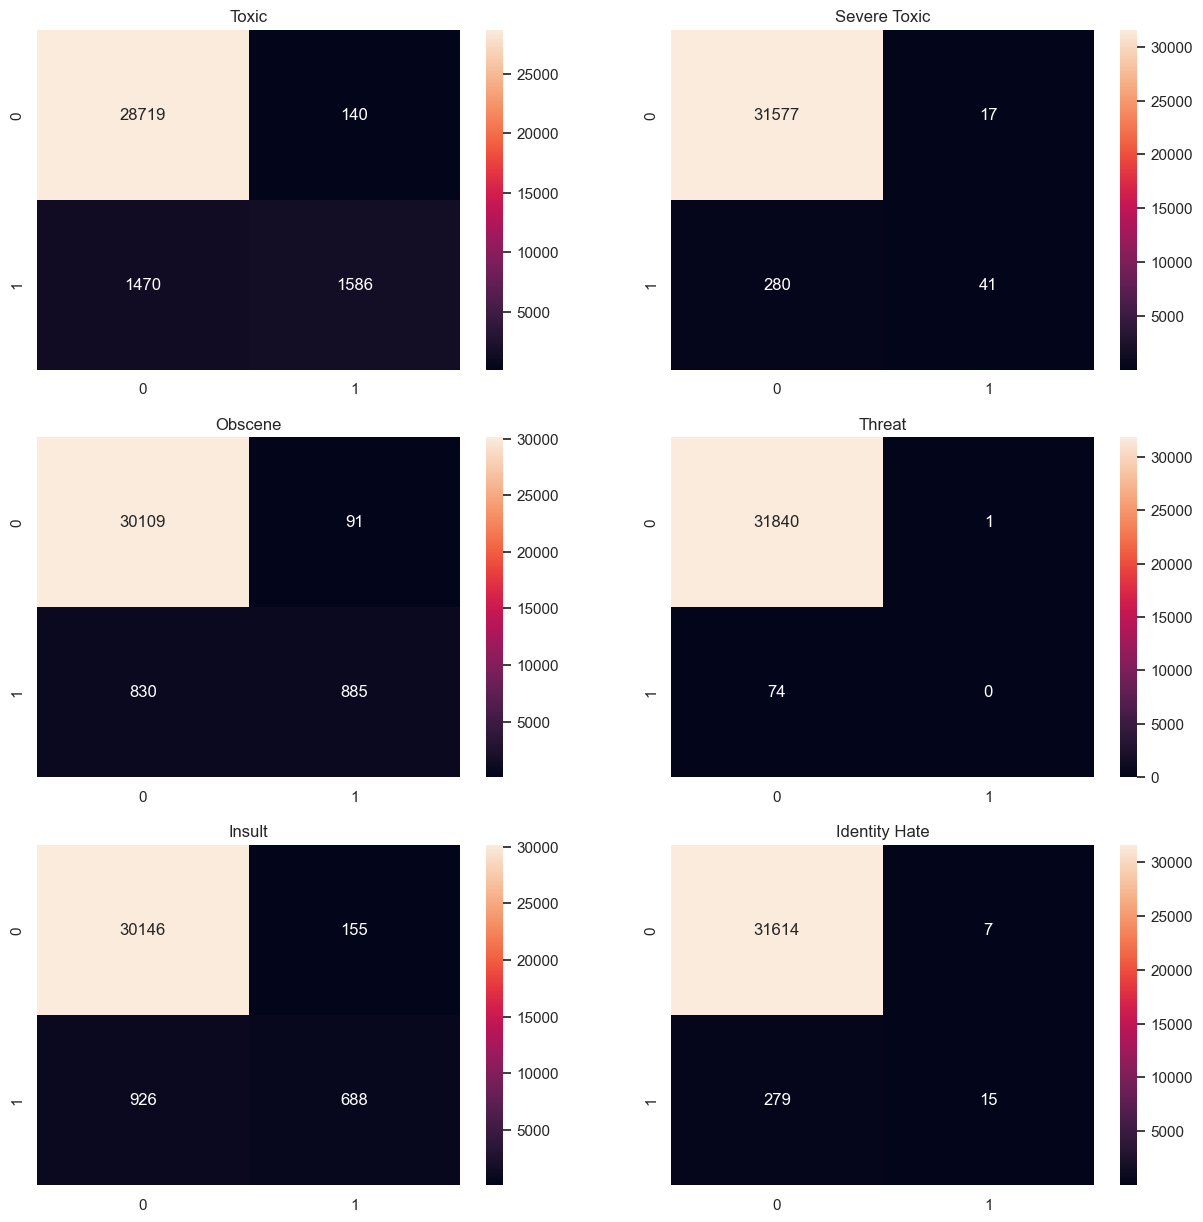

In [31]:
confMatrix(conf_Matrix)

In [32]:
param = {'alpha':[0.01, 0.1, 0.3, 0.5, 0.9]}
for category in categories:
    gridCV(multiNB, category, param)

Processing for : toxic
{'alpha': 0.1}
Processing for : severe_toxic
{'alpha': 0.5}
Processing for : obscene
{'alpha': 0.3}
Processing for : threat
{'alpha': 0.1}
Processing for : insult
{'alpha': 0.3}
Processing for : identity_hate
{'alpha': 0.5}


In [33]:

# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# sns.heatmap(conf_Matrix['toxic'], ax=axes[0,0], annot=True, fmt='g')
# sns.heatmap(conf_Matrix['severe_toxic'], ax=axes[0,1], annot=True, fmt='g')
# sns.heatmap(conf_Matrix['obscene'], ax=axes[1,0], annot=True, fmt='g')
# sns.heatmap(conf_Matrix['threat'], ax=axes[1,1], annot=True, fmt='g')
# sns.heatmap(conf_Matrix['insult'], ax=axes[2,0], annot=True, fmt='g')
# sns.heatmap(conf_Matrix['identity_hate'], ax=axes[2,1], annot=True, fmt='g')

# axes[0, 0].set_title('Toxic')
# axes[0, 1].set_title('Severe Toxic')
# axes[1, 0].set_title('Obscene')
# axes[1, 1].set_title('Threat')
# axes[2, 0].set_title('Insult')
# axes[2, 1].set_title('Identity Hate')


######  SVM

In [34]:
SVCModel = SVC()

In [35]:
for category in categories:
    metrics(SVCModel, train_X_dtm, y_train, test_X_dtm, y_test, category)

Processing for : toxic
Test accuracy is 0.9580134732884223
Processing for : severe_toxic
Test accuracy is 0.9900986996710011
Processing for : obscene
Test accuracy is 0.9779727400908663
Processing for : threat
Test accuracy is 0.9978066739777534
Processing for : insult
Test accuracy is 0.9701707660974463
Processing for : identity_hate
Test accuracy is 0.991665361115463


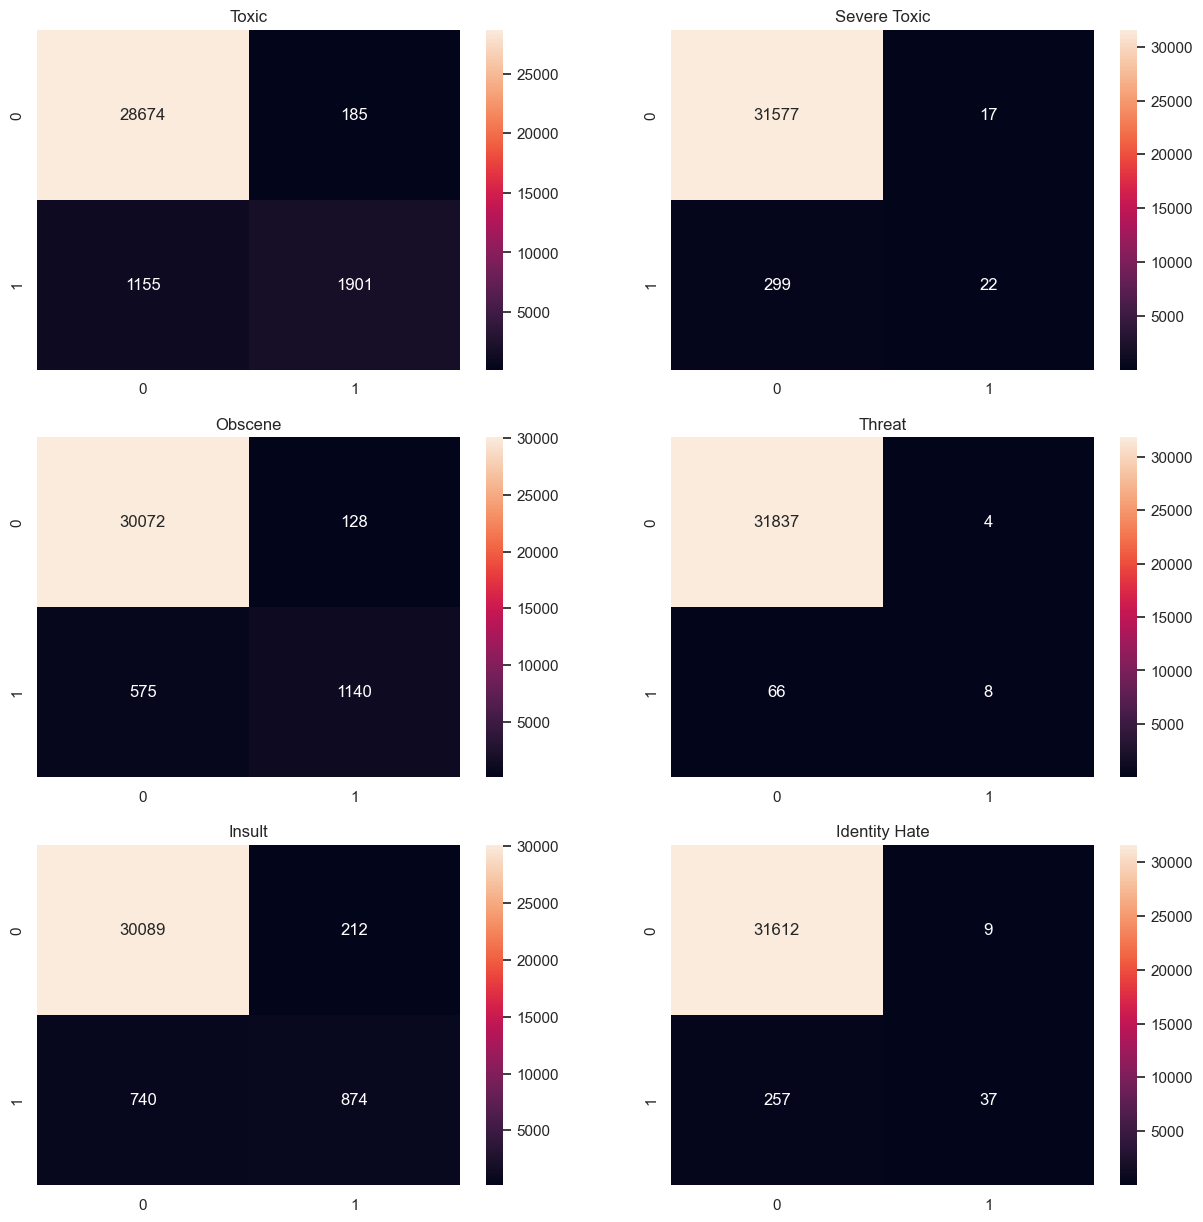

In [36]:
confMatrix(conf_Matrix)

#### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression


In [38]:
logisticRegr= LogisticRegression(max_iter=50000, C=0.9)

In [39]:
for category in categories:
    metrics(logisticRegr, train_X_dtm, y_train, test_X_dtm,y_test,category)

Processing for : toxic
Test accuracy is 0.9564154786150713
Processing for : severe_toxic
Test accuracy is 0.9906000313332289
Processing for : obscene
Test accuracy is 0.9769074103086323
Processing for : threat
Test accuracy is 0.9978380072066426
Processing for : insult
Test accuracy is 0.9691367695441016
Processing for : identity_hate
Test accuracy is 0.9917593608021307


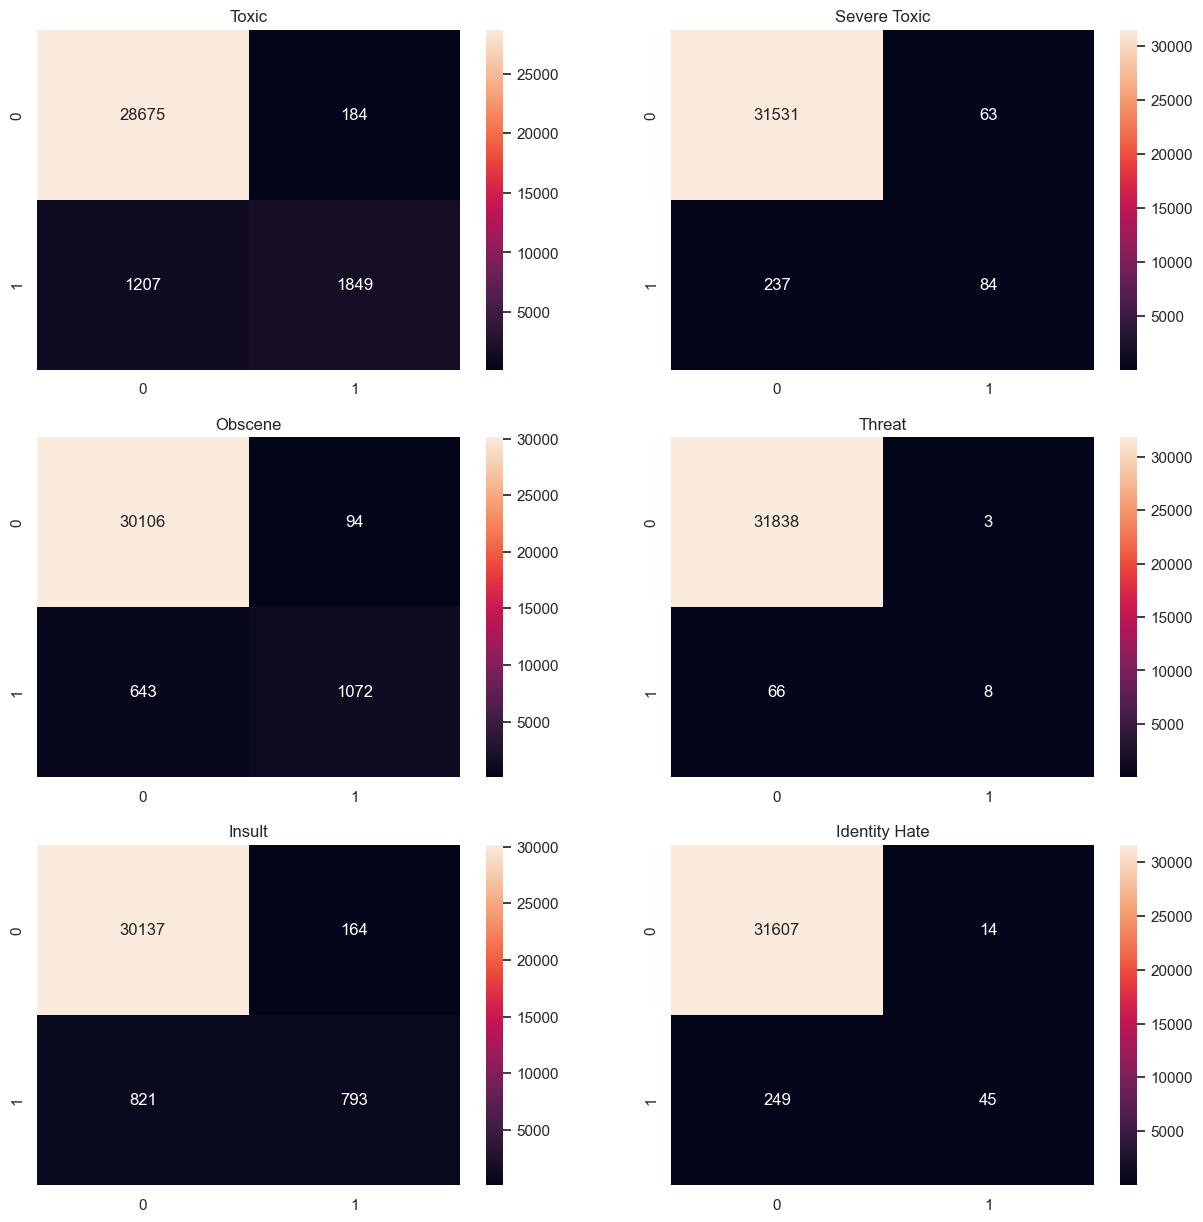

In [40]:
confMatrix(conf_Matrix)

In [41]:
C = np.logspace(0, 4, 10)
param = {'C':C}

#for category in categories:
#    gridCV(logisticRegr, category, param)

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
toxicpipe = Pipeline([('tfidf',TfidfVectorizer()),
                 ('logestic_regression',LogisticRegression(C=7.742636826811269, max_iter=50000))])

In [44]:
toxicpipe.fit(train.comment_text, train.toxic)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logestic_regression',
                 LogisticRegression(C=7.742636826811269, max_iter=50000))])

In [45]:
inpu = input("enter comment: ")
res = toxicpipe.predict([inpu])
if res[0] == 0: 
    print("Not Toxic") 
else: 
    print('Toxic')

enter comment: HIii im a princess
Not Toxic


In [63]:
severeToxicPipe = Pipeline([('tfidf',TfidfVectorizer()),
                 ('logestic_regression',LogisticRegression(max_iter=50000, C=0.9))])

In [64]:
severeToxicPipe.fit(train.comment_text, train.severe_toxic)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logestic_regression',
                 LogisticRegression(C=0.9, max_iter=50000))])

In [59]:
obscenePipe = Pipeline([('tfidf',TfidfVectorizer()),
                 ('SVM',SVC())])

In [60]:
obscenePipe.fit(train.comment_text, train.obscene)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('SVM', SVC())])

In [67]:
threatPipe = Pipeline([('tfidf',TfidfVectorizer()),
                 ('logestic_regression',LogisticRegression(max_iter=50000, C=0.9))])

In [68]:
threatPipe.fit(train.comment_text, train.threat)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logestic_regression',
                 LogisticRegression(C=0.9, max_iter=50000))])

In [72]:
insultPipe = Pipeline([('tfidf',TfidfVectorizer()),
                 ('SVC',SVC())])

In [73]:
insultPipe.fit(train.comment_text, train.insult)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('SVC', SVC())])

In [74]:
identityHatePipe = Pipeline([('tfidf',TfidfVectorizer()),
                 ('logestic_regression',LogisticRegression(max_iter=50000, C=0.9))])

In [75]:
identityHatePipe.fit(train.comment_text, train.insult)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logestic_regression',
                 LogisticRegression(C=0.9, max_iter=50000))])

In [93]:
inpu = input("enter comment: ")
res1 = toxicpipe.predict([inpu])
res2 = severeToxicPipe.predict([inpu])
res3 = obscenePipe.predict([inpu])
res4 = threatPipe.predict([inpu])
res5 = insultPipe.predict([inpu])
res6 = identityHatePipe.predict([inpu])
#if res[0] == 0: print("Not Toxic")  else: print('Toxic')
print("Not Toxic") if res1[0] == 0 else print('Toxic')
print("Not Severe Toxic") if res2[0] == 0 else print('Severe Toxic')
print("Not Obscene") if res3[0] == 0 else print('Obscene')
print("Not Threat") if res4[0] == 0 else print('Threat')
print("Not Insult") if res5[0] == 0 else print('Insult')
print("Not Identity Hate") if res6[0] == 0 else print('Identity Hate')

enter comment: shut up ass
Toxic
Not Severe Toxic
Obscene
Not Threat
Insult
Identity Hate


In [92]:
import joblib

In [94]:
joblib.dump(toxicpipe, 'Toxic Pipeline')
joblib.dump(severeToxicPipe, 'Severe Toxic Pipeline')
joblib.dump(obscenePipe, 'Obbscene Pipline')
joblib.dump(threatPipe, 'Threat Pipeline')
joblib.dump(insultPipe, 'Insult Pipeline')
joblib.dump(identityHatePipe, 'Identity Hate Pipeline')

['Identity Hate Pipeline']